In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
train_dir = "archive/casting_data/casting_data/train/"
test_dir = "archive/casting_data/casting_data/test/"

In [33]:
def create_data_generators(train_dir, test_dir, batch_size=32, image_size=(64, 64)): #Augmentation of images 
    datagen = ImageDataGenerator(rescale=1.0/255, 
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True)
    
    train_generator = datagen.flow_from_directory(
        directory=train_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=True)
    
    test_generator = datagen.flow_from_directory(
        directory=test_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=False)
    
    return train_generator, test_generator

train_generator, test_generator = create_data_generators(train_dir, test_dir)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,verbose=1, mode='max')
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
callbacks_list = [early_stopping, checkpoint]

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


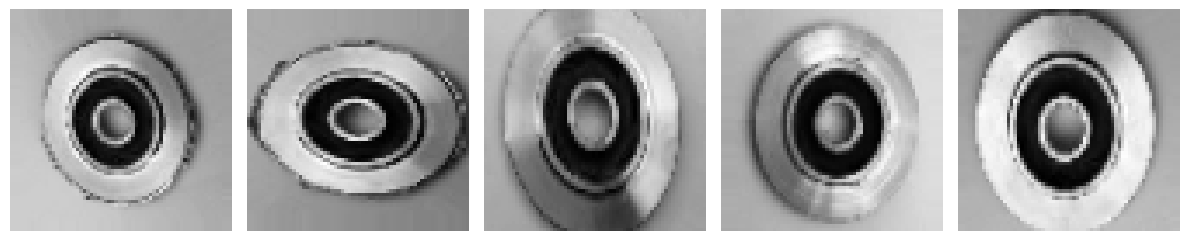

In [34]:
def visualize_samples(generator, num_images=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_batch[i].reshape(64, 64), cmap="gray")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_samples(train_generator)


In [35]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting by dropping 50% of nodes 

model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,753 (2.60 MB)

 Trainable params: 682,753 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=50,
                    callbacks=callbacks_list, verbose=1)

Epoch 1/50
207/208 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5662 - loss: 0.6861
Epoch 1: val_accuracy improved from -inf to 0.59580, saving model to best_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.5666 - loss: 0.6858 - val_accuracy: 0.5958 - val_loss: 0.6433
Epoch 2/50
207/208 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7485 - loss: 0.5245
Epoch 2: val_accuracy improved from 0.59580 to 0.85035, saving model to best_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7487 - loss: 0.5241 - val_accuracy: 0.8503 - val_loss: 0.3314
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8477 - loss: 0.3397
Epoch 3: val_accuracy improved from 0.85035 to 0.89930, saving model to best_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8478 - loss: 0.3396 - val_accuracy: 0.8993 - val_loss: 0.2542
Epoch 4/50
207/208 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8910 - loss: 0.2605
Epoch 4: val_accuracy did not impr

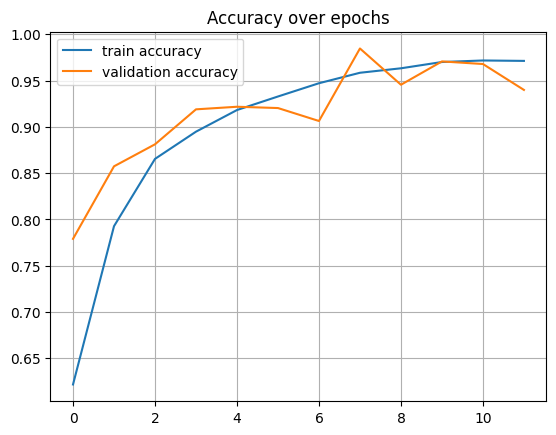

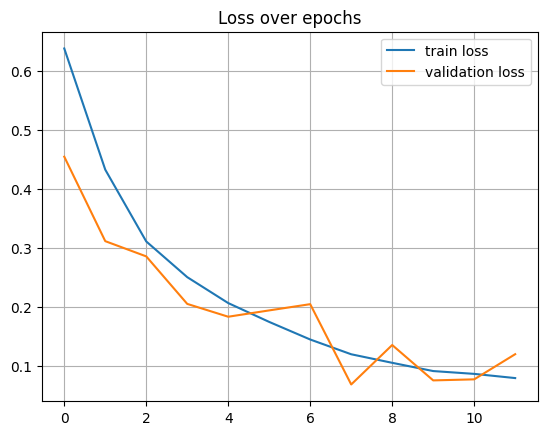

In [30]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
best_model = load_model('best_model.keras')
best_test_loss, best_test_accuracy = best_model.evaluate(train_generator)
print(f'Best Test accuracy: {best_test_accuracy} Best Test loss: {best_test_loss}')


208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9894 - loss: 0.0425
Best Test accuracy: 0.9903512597084045 Best Test loss: 0.0398753359913826
